In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [77]:
data = pd.read_csv('sms_senior.csv', delimiter=',', encoding='mbcs')[['Date', 'Word_Count']]

In [78]:
data

,Date,Word_Count
0,2017-01-01 00:08:00,12
1,2017-01-01 00:19:00,23
2,2017-01-01 01:53:00,25
3,2017-01-01 02:14:00,9
4,2017-01-01 02:25:00,29
...,...,...
5569,2017-03-31 21:13:00,22
5570,2017-03-31 22:19:00,19
5571,2017-03-31 23:15:00,27
5572,2017-03-31 23:32:00,11


In [79]:
data['Date'] = data['Date'].map(lambda c: pd.to_datetime(c)).map(lambda x: 100 * x.year + x.month)

In [80]:
data

,Date,Word_Count
0,201701,12
1,201701,23
2,201701,25
3,201701,9
4,201701,29
...,...,...
5569,201703,22
5570,201703,19
5571,201703,27
5572,201703,11


In [81]:
max = data.groupby('Date')['Word_Count'].max().to_frame('max').reset_index()

In [82]:
min = data.groupby('Date')['Word_Count'].min().to_frame('min').reset_index()

In [83]:
mean = data.groupby('Date')['Word_Count'].mean().to_frame('mean').reset_index()

In [84]:
median = data.groupby('Date')['Word_Count'].median().to_frame('median').reset_index()

In [85]:
std = data.groupby('Date')['Word_Count'].std().to_frame('std').reset_index()

In [86]:
var = data.groupby('Date')['Word_Count'].var().to_frame('var').reset_index()

In [87]:
res = pd.merge(max, min, left_on='Date', right_on='Date')
res = pd.merge(res, mean, left_on='Date', right_on='Date')
res = pd.merge(res, median, left_on='Date', right_on='Date')
res = pd.merge(res, std, left_on='Date', right_on='Date')
res = pd.merge(res, var, left_on='Date', right_on='Date')

In [88]:
res

,Date,max,min,mean,median,std,var
0,201701,190,2,16.336918,13,12.557171,157.682535
1,201702,100,2,16.029043,13,11.042459,121.935908
2,201703,115,2,16.285255,12,11.576213,134.008715


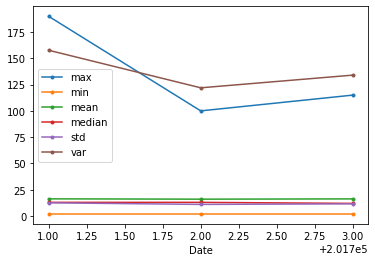

In [135]:
res.plot(style='.-', x='Date')

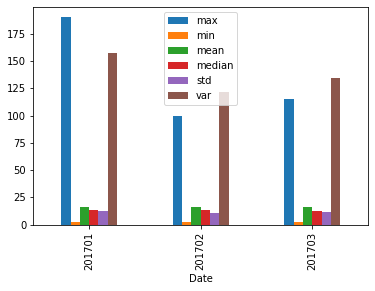

In [136]:
res.plot(kind='bar',  x='Date')